**Задание 1.** С помощью интерполяционного метода Адамса 4-ого порядка
найдите решение задачи Коши, используя шаги $h_{1} = 10^{−1}$, $h_{2} = 10^{−3}$, $h_{3} = 10^{−5}$. Сравните полученные приближенные решения с точным решением,
найденным аналитически. Постройте графики точного и трёх приближённых
решений исходной задачи (на одной координатной плоскости). Постройте
графики $|y_{A} − y_{T}|$, где $y_{A}$ – приближенное решение, полученное с помощью
использованного метода Адамса, а $y_{T}$ – точное решение исходной задачи
Коши. Укажите максимальное количество итераций (вычисленное
практическим путём), необходимых для решения одного нелинейного
уравнения.

$$t u′ − u (t ln (\frac{t^2}{u}) + 2) = 0, u(1) = 2, t \in [1; 11];$$
Преобразуем:
$$u′ = u (ln (\frac{t^2}{u}) + \frac{2}{t});$$
$$ f(t, y) = y(ln (\frac{t^2}{y}) + \frac{2}{t});$$
Найдём производную (для метода Ньютона)
$$ \frac{df}{dy} = ln (\frac{t^2}{y}) + \frac{2}{t} - 1;$$
Вычислим точное решение:
$$y_{T}(t)=2^{(e^{(1 - t)})}t^{2}$$

In [24]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
plt = Matplotlib::Pyplot

def f(t, y)
    y * (Math.log(t**2/y) + 2/t)
end

def dfdy(t, y)
    Math.log(t**2/y) + 2/t - 1
end

def y_t(t)
    (2**(Math::E**(1 - t))) * t**2
end

@max_iter = 0

0

Метод Адамса 4-го порядка:
$$y_{i+1} = y_{i}^{[4]} + h(\frac{9}{24}f_{i+1}^{[3]}+\frac{19}{24}f_{i}^{[3]}-\frac{5}{24}f_{i-1}^{[3]}+\frac{1}{24}f_{i-2}^{[3]});$$
Для нахождения первых 3-х значений понадобится метод Рунге-Кутты 4-го порядка:
$$k_1 = hf(x, y),$$
$$k_2 = hf(x+\frac{h}{3}, y+\frac{k_1}{3}),$$
$$k_3 = hf(x+\frac{2h}{3}, y-\frac{k_1}{3}+k_2),$$
$$k_4 = hf(x+h, y+k_1-k_2+k_3),$$
$$y(x + h) = y(x) + \frac{1}{8}(k_1+3k_2+3k_3+k_4)$$
Также понадобится использовать метод Ньютона:
$$F(y_{i+1}) = y_{i+1} - y_{i} - h(\frac{9}{24}f_{i+1}+\frac{19}{24}f_{i}-\frac{5}{24}f_{i-1}+\frac{1}{24}f_{i-2}) = 0;$$
$$F(y_{i+1}) = y_{i+1} - \frac{9h}{24}f(x_{i+1}, y_{i+1}) - C, C = y_{i} + h(\frac{19}{24}f_{i}-\frac{5}{24}f_{i-1}+\frac{1}{24}f_{i-2});$$
$$F'(y_{i+1}) = 1 - \frac{9h}{24}f'(x_{i+1}, y_{i+1});$$
$$y_{i+1}^{j + 1} = y_{i+1}^{j} - \frac{F(y_{i+1}^{j})}{F'(y_{i+1}^{j})};$$

In [25]:
def runge_kutta_4(x, y, h)
    k1 = h * f(x, y)
    k2 = h * f(x + h/3.0, y + k1/3.0)
    k3 = h * f(x + 2*h/3.0, y - k1/3.0 + k2)
    k4 = h * f(x + h, y + k1 - k2 + k3)
    y + 1/8.0*(k1 + 3*k2 + 3*k3 + k4)
end

def adams_4(x, y_s, h) #Может и так сойдёт, не с общем виде?
    c = y_s[2] + h/24.0 * (19*f(x, y_s[2]) - 5*f(x - h, y_s[1]) + f(x - 2*h, y_s[0]))
    eps = 0.000001
    y = y_s[2]
    y_prev = 0
    i = 0
    while ((y - y_prev).abs > eps) do
        y_prev = y
        y -= (y - 9*h/24.0*f(x + h, y) - c)/(1.0 - 9*h/24.0*dfdy(x + h, y))
        i += 1
    end
    @max_iter = [i, @max_iter].max
    y
end

:adams_4

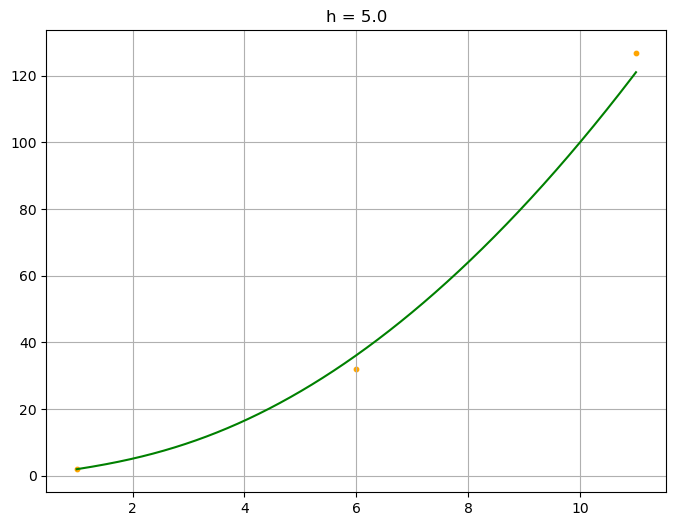

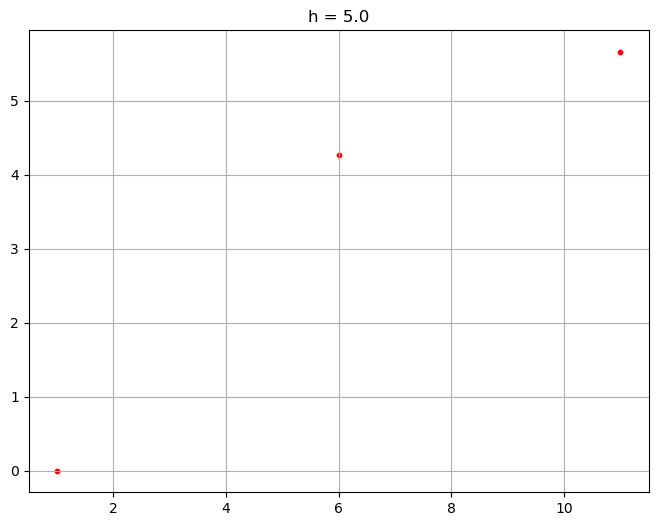

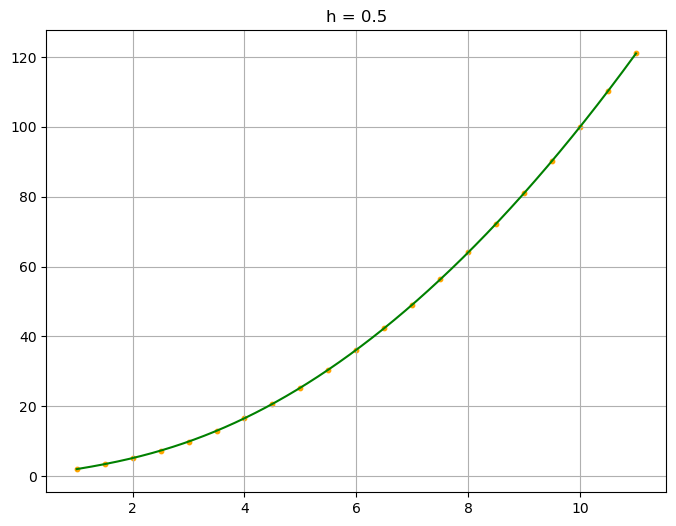

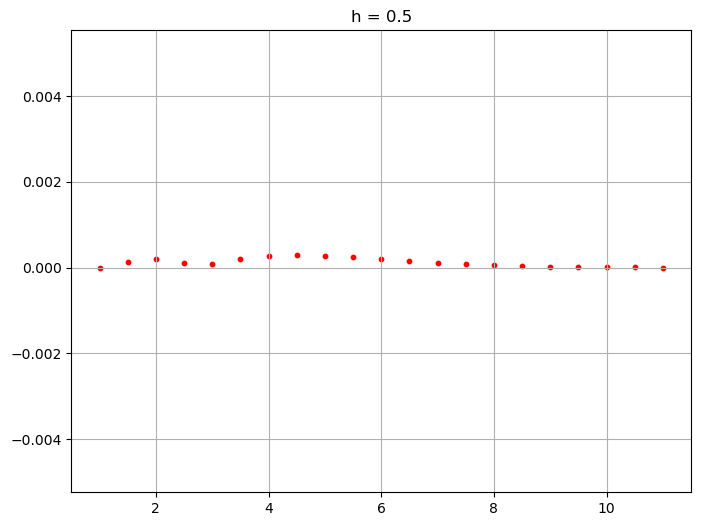

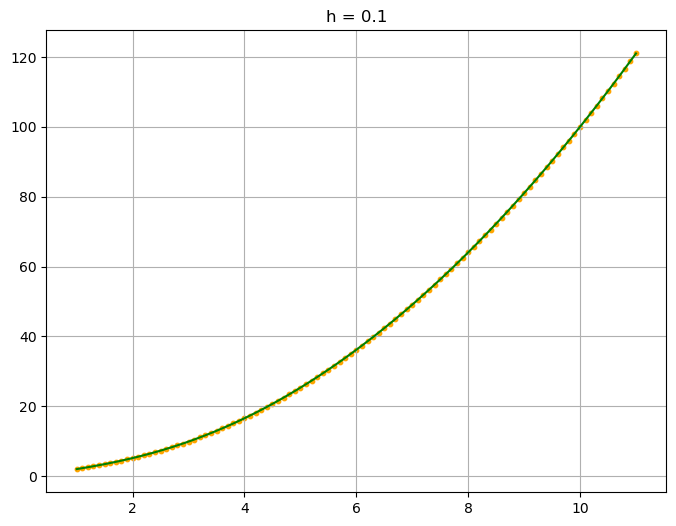

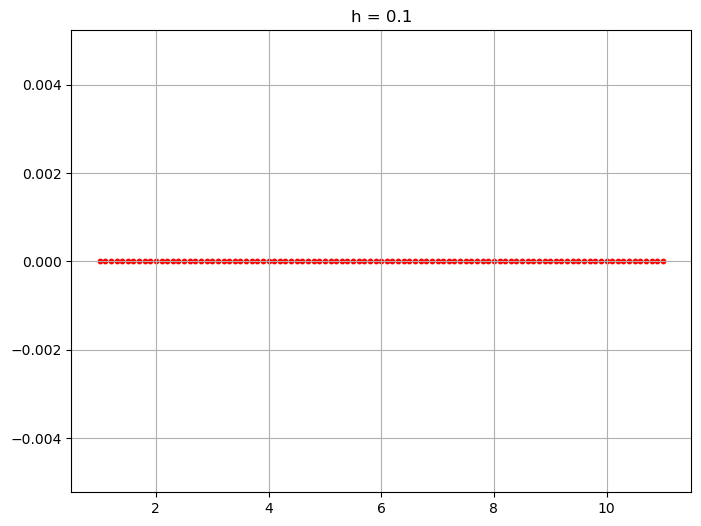

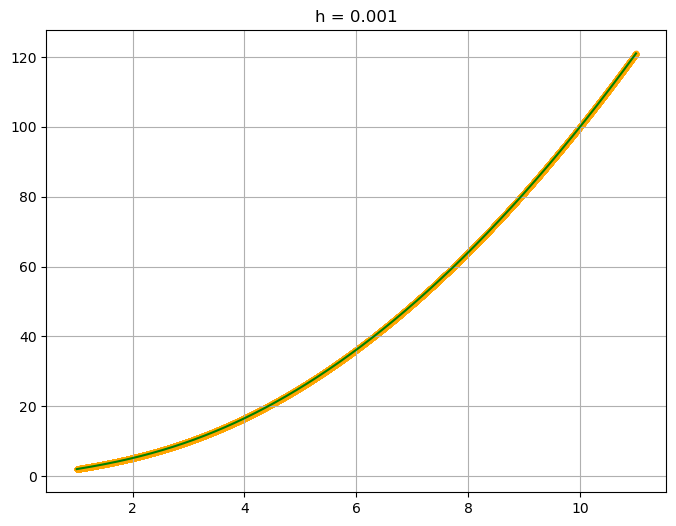

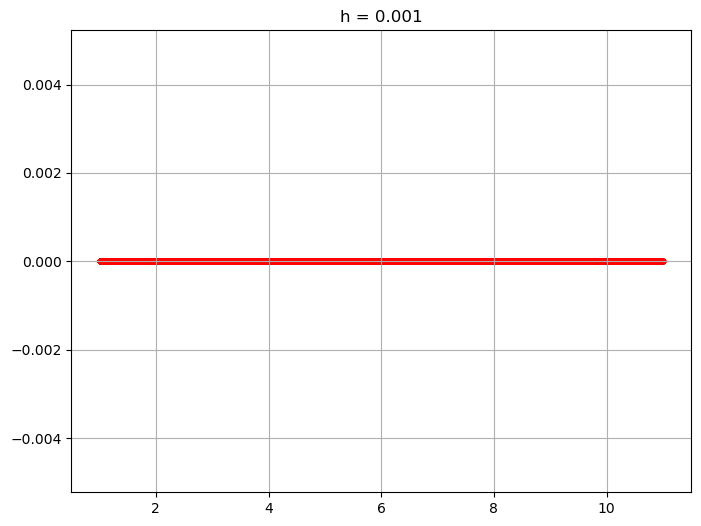

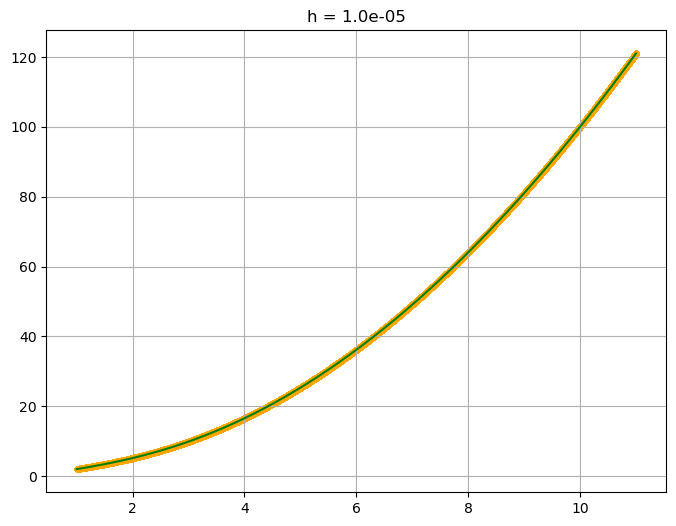

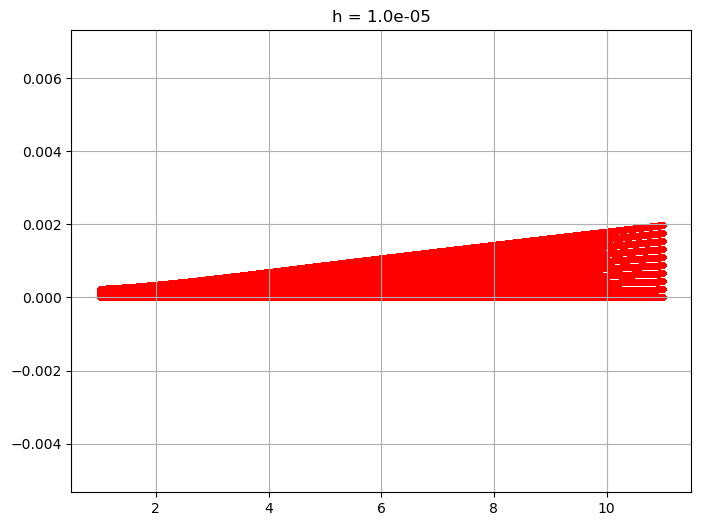

4

In [26]:
a = 1
b = 11
y0 = 2
h_i = [5.0, 0.5, 0.1, 0.001, 0.00001]
points = [*0..100_000].map { |i|  i * 0.00001 * (b - a) + a}
h_i.each do |h|
    plt.figure
    plt.gcf().set_size_inches(8, 6)
    plt.title("h = " + h.to_s)
    len = (b - a)/h
    x_s = [*0..len].map { |i| i * h  + a}
    y_s = []
    deltas = []
    y_s[0] = y0
    (1..2).each {|i| y_s[i] = runge_kutta_4(x_s[i - 1], y_s[i - 1], h)}
    (3..len).each {|i| y_s[i] = adams_4(x_s[i - 1], y_s[i-3..i-1], h)}
    plt.plot(points, points.map{ |p| y_t(p)}, "green")
    plt.scatter(x_s, y_s, 10, "orange")
    plt.grid
    plt.show
    plt.figure
    plt.gcf().set_size_inches(8, 6)
    plt.title("h = " + h.to_s)
    koef = 100_000 / len
    (0..len).each {|i| deltas[i] = (y_t(points[i * koef]) - y_s[i]).abs}
    plt.scatter(x_s, deltas, 10, "red")
    plt.grid
    plt.show
end
@max_iter
#На одной координатной плоскости не получается, т. к. решения близки и
#последнее перекрывает предыдущие

*Вывод:* Решения, полученые с помощью метода Адамса, практически совпадают с точным решением даже при относительно большом $h$ (только при $h = 0.5$ заметна погрешность).
Вычислено, что при $\epsilon=10^{-6}$ максимальное число итераций метода Ньютона равно $4$ (мне кажется более логичным использовать $\epsilon=O(h^4)$, но при $h=10^{-5}$ такая точность недостижима).

**Задание 2.** Методами сеток второго и четвертого порядков найдите
приближенное решение граничной задачи, используя шаги $h_{1} = 10^{−2}$, $h_{2} = 10^{−3}$, $h_{3} = 10^{−4}$. В отчет нужно обязательно включить вывод разностных схем
для вашей задачи. Также решите данную задачу методом стрельбы. Для
решения задач Коши используйте неявный метод Рунге-Кутты третьего
порядка с автоматическим выбором шага. Шаг нужно выбирать таким образом,
чтобы обеспечить точность не менее $10^{-12}$ на каждом шаге. Сравните
полученные приближенные значения. Постройте график полученных решений.
$$\begin{cases}
u′′ + 2tu′ − (t^2 + 1)u = −2t^4 + 6t^2 + 4,\\
u′(0) + \frac{1}{2}u(0) = 0,\\
u′(1) − u(1) = 2.
\end{cases}$$

Будем выводить разностные схемы, использующие не более трёх точек:
$$u(x+h) = u(x) + hu'(x) + \frac{1}{2}h^2u''(x) + \frac{1}{6}h^3u^{(3)}(x) + \frac{1}{24}h^4u^{(4)}(x) + \frac{1}{120}h^5u^{(5)}(x) + O(h^6)$$
$$u(x-h) = u(x) - hu'(x) + \frac{1}{2}h^2 u''(x) - \frac{1}{6}h^3u^{(3)}(x) + \frac{1}{24}h^4u^{(4)}(x) - \frac{1}{120}h^5u^{(5)}(x) + O(h^6)$$
$$u(x+h) + u(x-h) = 2u(x) + h^2 u''(x) + \frac{1}{12}h^4u^{(4)}(x) + O(h^6)$$
$$u(x+h) - u(x-h) = 2hu'(x) + \frac{1}{3}h^3u^{(3)}(x) + \frac{1}{60}h^5u^{(5)}(x) + O(h^6)$$
$$u''(x) = \frac{u(x+h) + u(x-h) - 2u(x)}{h^2} - \frac{1}{12}h^2u^{(4)}(x) + O(h^4) = \frac{u(x+h) + u(x-h) - 2u(x)}{h^2} + O(h^2)$$
$$u'(x) = \frac{u(x+h) - u(x-h)}{2h} - \frac{1}{6}h^2u^{(3)}(x) + O(h^4) = \frac{u(x+h) - u(x-h)}{2h} + O(h^2)$$

Очевидно необходимо заменить $u^{(3)}(x)$ и $u^{(4)}(x)$ с погрешностью $O(h^2)$
$$u′′(x) = - 2xu′(x) + (x^2 + 1)u(x) − 2x^4 + 6x^2 + 4;$$
$$u^{(3)}(x) = -2x(xu''(x) + 4x^2 - 6) + (x^2 - 4 x + 1)u'(x) + 2xu(x) = 
-2x^2\frac{u(x+h) + u(x-h) - 2u(x)}{h^2} + (x^2 - 4 x + 1)\frac{u(x+h) - u(x-h)}{2h} + 2xu(x) - 8x^3 + 12x;$$
$$u^{(4)}(x) = -2x^2u^{(3)}(x) + (x^2 - 8x + 1)u''(x) + 4(x - 1)u'(x) + 2u(x) - 24 x^2 + 12 = (4x^4 + x^2 - 8x + 1)\frac{u(x+h) + u(x-h) - 2u(x)}{h^2} + (-2x^4 + 8x^3 - 2x^2 + 4x - 4)\frac{u(x+h) - u(x-h)}{2h} + 2u(x) - 24 x^2 + 12$$

С точностью $O(h^2)$:
$$\frac{u(x+h) + u(x-h) - 2u(x)}{h^2} + x\frac{u(x+h) - u(x-h)}{h} - (x^2 + 1)u(x) = -2x^4 + 6x^2 + 4;$$
$$(1 - xh)u(x-h) + (-x^2h^2 -h^2 - 2)u(x) + (1 + xh)u(x+h) = (-2x^4 + 6x^2 + 4)h^2;$$

С точностью $O(h^4)$:
$$(h(-x^4+6x^3-9x^2+4x-2) - \frac{12x}{h} - 4x^4 + 8x^3-x^2-8x+11)u(x-h) + (-8x^4-16x^3-14x^2-16x-18-2h^2(1+4x^2))u(x) + (h(x^4-6x^3+9x^2-4x+2) + \frac{12x}{h} - 4x^4 + 8x^3-x^2-8x+11)u(x+h) = 12h^2(1 + 2x^2 -\frac{8x^4}{3}) -24x^4 + 72x^2 + 48;$$

Далее рассмотрим начальные условия:
$$u'(0) = \frac{u(h) - u(0)}{h} - \frac{1}{2}hu''(0) - \frac{1}{6}h^2u^{(3)}(0) - \frac{1}{24}h^3u^{(4)}(0) + O(h^4) = \frac{u(h) - u(0)}{h} - \frac{1}{2}hu''(0) + O(h^2)$$
$$u'(1) = \frac{u(1) - u(1-h)}{h} + \frac{1}{2}hu''(1) + \frac{1}{6}h^2u^{(3)}(1) + \frac{1}{24}h^3u^{(4)}(1) + O(h^4) = \frac{u(1) - u(1-h)}{h} + \frac{1}{2}hu''(1) + O(h^2)$$
$$u''(0) = u(0) + 4;$$
$$u''(1) = -2u'(1) + 2u(1) + 8;$$
$$u^{(3)}(0) = u'(0);$$
$$u^{(3)}(1) = -2u''(1) - 2u'(1) + 2u(1) + 4;$$
$$u^{(4)}(0) = u''(0) - 4u'(0) + 2u(0) + 12;$$
$$u^{(4)}(1) = -2u^{(3)}(1) -6u''(1) + 2u(1) - 12;$$

С точностью $O(h^2)$:
$$\frac{h - h^2 - 2}{2}u(0) + u(h) = 2h^2;$$
$$-1u(1-h) + (1 - h)u(1)= (-2h^2 + 2h);$$
С точностью $O(h^4)$:
$$(-12 + 6h - 6h^2 + h^3 - \frac{5}{2}h^4)u(0) + 12u(h) = 24h^2 + 8h^4$$
$$(-12)u(1-h) + (12 - 12h - 44h^3 - h^4)u(1) = 24h - 24h^2 + 16h^3 - 10h^4$$

Метод стрельбы:
$$\begin{cases}
u' = v,\\
v' = - 2xv + (x^2 + 1)u-2x^4 + 6x^2 + 4,\\
v(0) + \frac{1}{2}u(0) = 0,\\
v(1) - u(1) = 2.
\end{cases}$$
$$\begin{cases}
u'(x) = v(x),\\
v'(x) = - 2xv(x) + (x^2 + 1)u(x)-2x^4 + 6x^2 + 4,\\
v(0) = \epsilon,\\
u(0) = -2\epsilon,\\
v(1) - u(1) = 2.
\end{cases}$$
Выведем метод Рунге-Кутты:
$$k_1 = hf(x_i + h, y_i + k_1),$$
$$k_2 = hf(x_i + \frac{1}{3}h, y_i - \frac{1}{3}k_1 + \frac{2}{3}k_2),$$
$$y_{i+1} = y_i + \frac{1}{4}(k_1 + 3k_2).$$

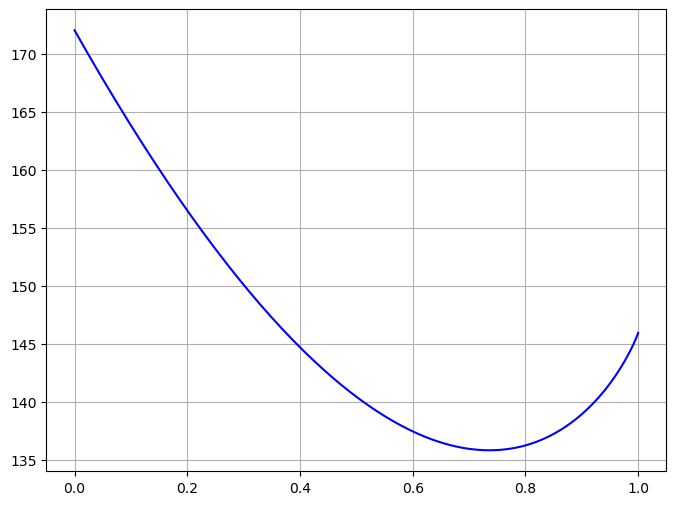

In [34]:
def fm(x, uv)
    [uv[1], -2.0*x*uv[1] + (x**2 + 1.0)*uv[0] - 2.0*x**4 + 6.0*x**2 + 4.0]
end

def runge_kutta_3(x, uv, h)
    k1 = [1, 1]
    kprev = [0, 0]
    eps = 0.000001
    while ((k1[0] - kprev[0]).abs > eps) do
        kprev = k1
        k1[0] = h*fm(x + h, [uv[0] + k1[0], uv[1] + k1[1]])[0]
    end
    while ((k1[1] - kprev[1]).abs > eps) do
        kprev = k1
        k1[1] = h*fm(x + h, [uv[0] + k1[0], uv[1] + k1[1]])[1]
    end
    k2 = [1, 1]
    kprev = [0, 0]
    while ((k2[0] - kprev[0]).abs > eps) do
        kprev = k2
        k2[0] = h*fm(x + h/3.0, [uv[0] - k1[0]/3.0 + 2.0*k2[0]/3.0, uv[1] - k1[1]/3.0 + 2.0*k2[1]/3.0])[0]
    end
    while ((k2[1] - kprev[1]).abs > eps) do
        kprev = k2
        k2[1] = h*fm(x + h/3.0, [uv[0] - k1[0]/3.0 + 2.0*k2[0]/3.0, uv[1] - k1[1]/3.0 + 2.0*k2[1]/3.0])[1]
    end
    [uv[0] + 0.25*(k1[0] + 3.0*k2[0]), uv[1] + 0.25*(k1[1] + 3.0*k2[1])]
end

def shot(e)
    eps = 0.000001
    xs = [0.0]
    uvs = [[-2.0 * e, e]]
    while (true) do
        h = 1.0 - xs[-1]
        res1 = runge_kutta_3(xs[-1], uvs[-1], h)
        res2 = runge_kutta_3(xs[-1] + h/2.0, runge_kutta_3(xs[-1], uvs[-1], h/2.0), h/2.0)
        c = 1.0*(res2[0] - res1[0])/(h**3 - 1.0/27*h**3)
        heps = (eps/c)**(1.0/3)
        if (heps < h/2.0)
            uvs.push(runge_kutta_3(xs[-1], uvs[-1], heps))
            xs.push(xs[-1] + heps)
        else
            uvs.push(res2)
            xs.push(1.0)
            break
        end
    end
    [xs, uvs]
end

def delta(uv)
    uv[1] - uv[0] - 2
end

def shooting
    eps = 0.000001
    n_neg, n_pos = -1.0, 1.0
    d_neg, d_pos = 1.0, 1.0
    while(d_pos*d_neg > 0.0) do
        n_neg*=2.0
        n_pos*=2
        d_pos = delta(shot(n_pos)[1][-1])
        d_neg = delta(shot(n_neg)[1][-1])
    end
    n_av = (n_pos + n_neg)/2.0
    ans = shot(n_av)
    d_av = delta(ans[1][-1])
    while(d_av.abs > eps)
        if (d_av > 0)
            if (d_pos > 0) &&
                n_pos = n_av
            else
                n_neg = n_av
            end
        else
            if (d_pos < 0) &&
                n_pos = n_av
            else
                n_neg = n_av
            end
        end
        n_av = (n_pos + n_neg)/2.0
        ans = shot(n_av)
        d_av = delta(ans[1][-1])
    end
    ans
end

ans = shooting
a_x = ans[0]
a_y = ans[1].map {|uv| uv[0]}
plt.figure
plt.gcf().set_size_inches(8, 6)
plt.plot(a_x, a_y, "blue")
plt.grid
plt.show

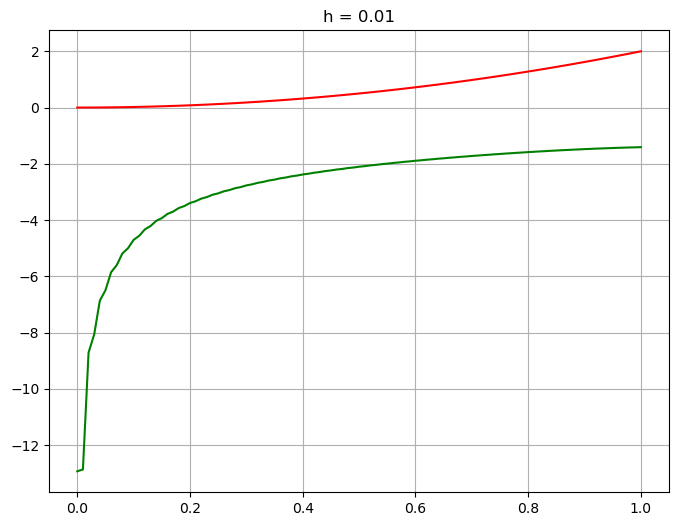

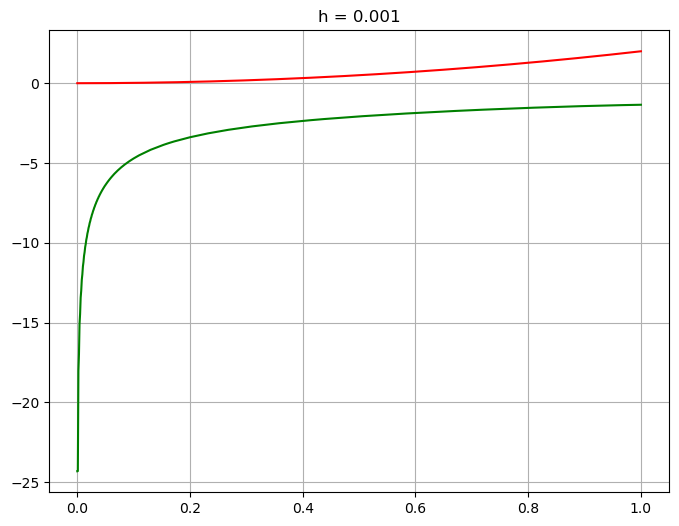

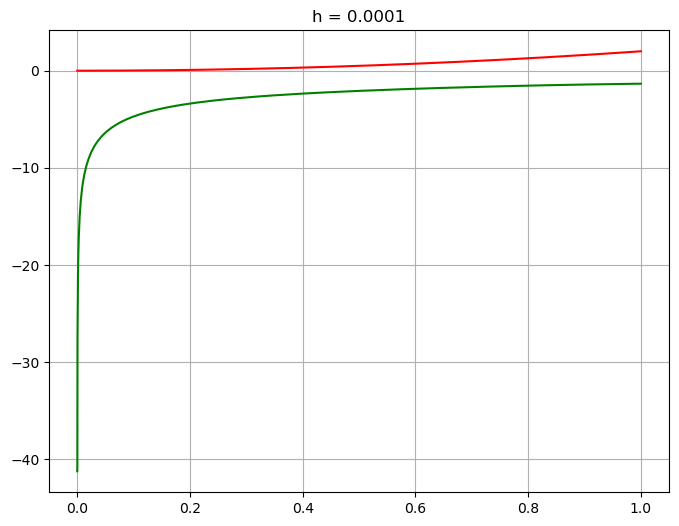

[0.01, 0.001, 0.0001]

In [37]:
def Ab_2(h)
    len = 1/h
    matrix = Array.new(4) { Array.new(len + 1) } #Три диагонали и правая часть
    matrix[0][0], matrix[1][0], matrix[3][0] = 1.0, (h - h**2 - 2)/2.0, 2.0*h**2
    matrix[1][len], matrix[2][len], matrix[3][len] = 1.0 - h, -1.0, -2.0*h**2 + 2.0*h
    (1...len).each do |i|
        x = i*h
        matrix[0][i], matrix[1][i], matrix[2][i], matrix[3][i] = 1.0 + x*h, -x**2*h**2 - h**2 - 2.0,
        1.0 - x*h, (-2.0*x**4 + 6.0*x**2 + 4.0)*h**2
    end
    matrix
end

def Ab_4(h)
    len = 1/h
    matrix = Array.new(4) { Array.new(len + 1) } #Три диагонали и правая часть
    matrix[0][0], matrix[1][0], matrix[3][0] = 12.0, -12.0 + 6.0*h - 6.0*h**2 + h**3 - 5.0/2*h**4,
    24.0*h**2 + 8.0*h**4
    matrix[1][len], matrix[2][len], matrix[3][len] = 12.0 - 12.0*h - 44.0*h**3 - h**4, -12.0,
    24.0*h - 24.0*h**2 + 16.0*h**3 - 10.0*h**4
    (1...len).each do |i|
        x = i*h
        matrix[0][i], matrix[1][i], matrix[2][i], matrix[3][i] = h*(x**4 - 6.0*x**3 + 9.0*x**2
            - 4.0*x + 2.0) + 12.0*i - 4.0*x**4 + 8.0*x**3 - x**2 - 8.0*x + 11.0,
        -8.0*x**4 - 16.0*x**3 - 14.0*x**2 - 16.0*x - 18.0 - 2.0*h**2*(1.0 + 4.0*x**2),
        -1.0*h*(x**4 - 6.0*x**3 + 9.0*x**2
            - 4.0*x + 2.0) - 12.0*i - 4.0*x**4 + 8.0*x**3 - x**2 - 8.0*x + 11.0,
        12.0*h**2*(1.0 + 2.0*x**2 - 8.0*x**4/3.0) - 24.0*x**4 + 72.0*x**2 + 48.0
    end
    matrix
end

def solve(matrix)
    len = matrix[0].length - 1
    (1..len).each do |i|
        matrix[1][i] -= 1.0*matrix[2][i]*matrix[0][i - 1]/matrix[1][i - 1]
        matrix[3][i] -= 1.0*matrix[2][i]*matrix[3][i - 1]/matrix[1][i - 1]
    end
    matrix[3][len] = 1.0*matrix[3][len]/matrix[1][len]
    (0...len).reverse_each do |i|
        matrix[3][i] = 1.0*(matrix[3][i] - matrix[0][i]*matrix[3][i + 1])/matrix[1][i]
    end
    matrix[3]
end

[0.01, 0.001, 0.0001].each do |h|
    plt.figure
    plt.gcf().set_size_inches(8, 6)
    plt.title("h = " + h.to_s)
    x_s = [*0..1/h].map { |i| i * h}
    plt.plot(x_s, solve(Ab_2 h), "red")
    plt.plot(x_s, solve(Ab_4 h), "green")
    plt.grid
    plt.show
end

*Вывод:* ~~метод сеток второго порядка при не слишком маленьких $h$ не даёт достаточной точности в данной задаче~~ где-то в формулах ошибка. 